Usefull in clustering analysis. Used in the O&G industry for liquil-loading detection using k-means clustering and lithology classification clustering.


# K-mean clustering

How does k-means clustering works:

- Standarize the data

- Determine the number of clusters, using (i) elbow method, (ii) silhouette, or (iii) hierarchical clustering. If unsure, write a for loop to calculate the sum of squared errors versus numbers of clusters. Afterwards, determine the numbers of clusters that will be used.

- The inicialization of centroids within a dataset can be initialized randomly or selected purposefully. The default initialization is random initialization.If random initialization does not work, carefully selecting the initial centroids could potentially help the model.

- Find the distance between each point and the centroid. (euclidian, manhattan...).

- Find the average value of instances assigned to each cluster centroid (that was assigned in step 4) and recalculate a new centroid for each cluster by moving the cluster centroid to the average of instances average for eack cluster.

- Since new centroids are created in step 5, reassign each data point to a newly generated centroids based on one of the distance functions.

- Reapeat steps a and 6 until the model coverages.


k-means disvantages:

- k-means is very sensitive to outlier points.

- k-means requires a number of clusters to be defined. This could also be classified as disvantage.


# Exercise

Data set containing 438 wells with their respective geological features.

In [2]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df.describe()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,157.972603,2.242265,22.438356,0.159863,20.283105,0.063221,9935.125571
std,30.396528,0.019978,7.971895,0.037465,3.187825,0.008410,827.981530
min,66.000000,2.209100,5.000000,0.100000,10.000000,0.032000,8046.000000
25%,139.000000,2.226425,17.000000,0.130000,19.000000,0.057000,9372.250000
50%,155.000000,2.239300,22.000000,0.150000,20.000000,0.065000,9844.500000
75%,178.000000,2.255925,26.000000,0.190000,22.000000,0.070000,10440.000000
max,259.000000,2.319600,49.000000,0.310000,33.000000,0.077000,12474.000000


<ipython-input-5-e716f995bbad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GR_API'], norm_hist=True, color='g')


<Axes: xlabel='GR_API', ylabel='Density'>

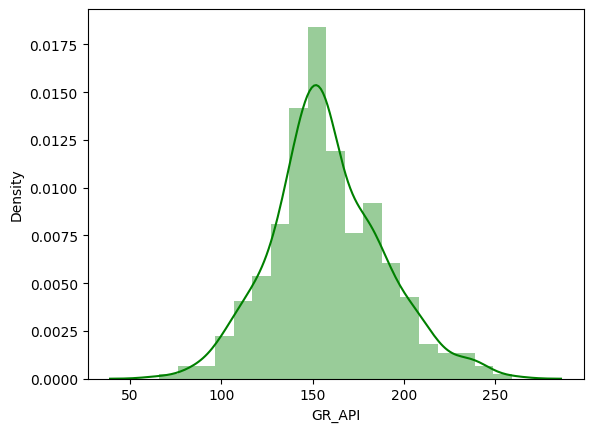

In [5]:
# Bellow is for showing the distribution of gamma ray.
sns.distplot(df['GR_API'], norm_hist=True, color='g')

<ipython-input-6-a60ccc879429>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bulk Density, gcc'], norm_hist=True, color='g')


<Axes: xlabel='Bulk Density, gcc', ylabel='Density'>

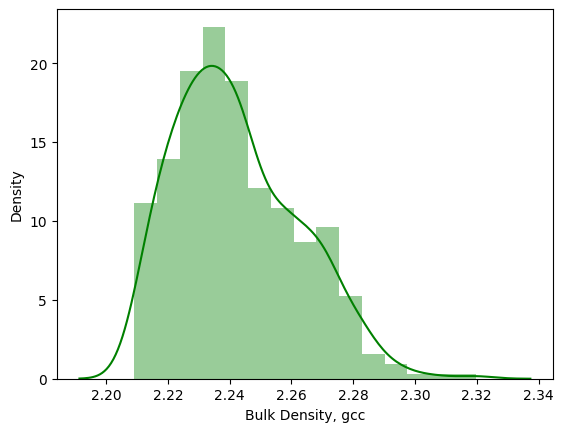

In [6]:
sns.distplot(df['Bulk Density, gcc'], norm_hist=True, color='g')

<ipython-input-7-fc85fa5325a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Resistivity, ohm-m'], norm_hist=True, color='g')


<Axes: xlabel='Resistivity, ohm-m', ylabel='Density'>

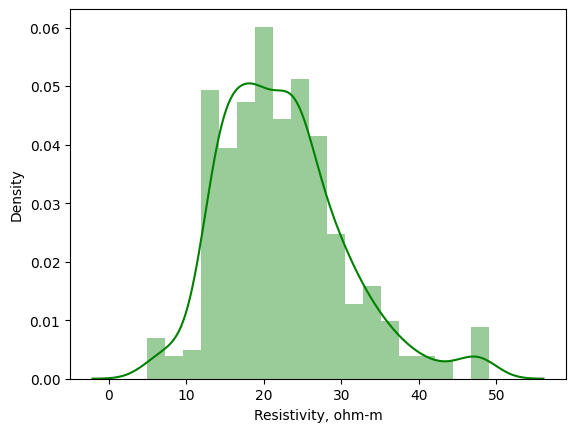

In [7]:
sns.distplot(df['Resistivity, ohm-m'], norm_hist=True, color='g')

<ipython-input-8-d36a1f808cfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water Saturation, fraction'], norm_hist=True, color='g')


<Axes: xlabel='Water Saturation, fraction', ylabel='Density'>

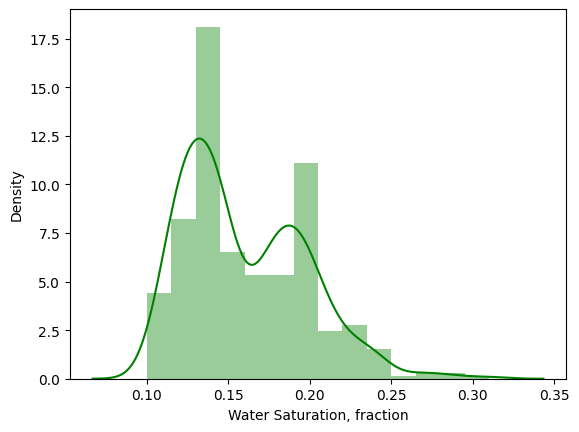

In [8]:
sns.distplot(df['Water Saturation, fraction'], norm_hist=True, color='g')

<ipython-input-9-3bd38f9f96e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PhiH, ft'], norm_hist=True, color='g')


<Axes: xlabel='PhiH, ft', ylabel='Density'>

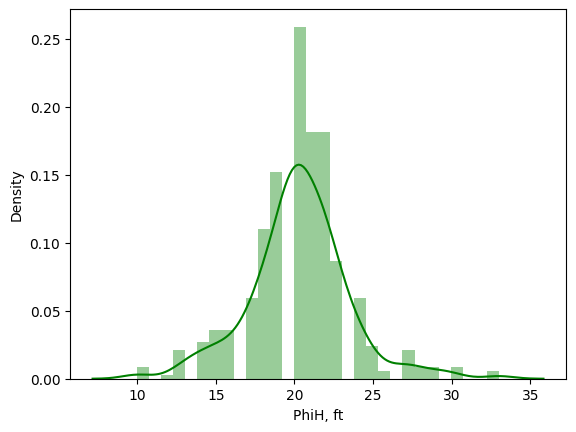

In [9]:
sns.distplot(df['PhiH, ft'], norm_hist=True, color='g')

<ipython-input-10-84ddd31530e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TOC, fraction'], norm_hist=True, color='g')


<Axes: xlabel='TOC, fraction', ylabel='Density'>

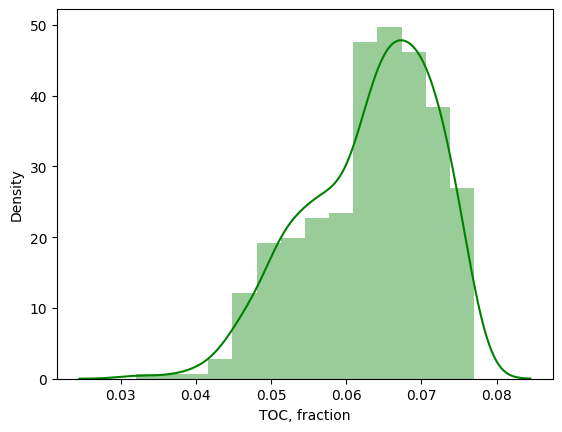

In [10]:
sns.distplot(df['TOC, fraction'], norm_hist=True, color='g')

<ipython-input-11-72a4795f7ee5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TVD, ft'], norm_hist=True, color='g')


<Axes: xlabel='TVD, ft', ylabel='Density'>

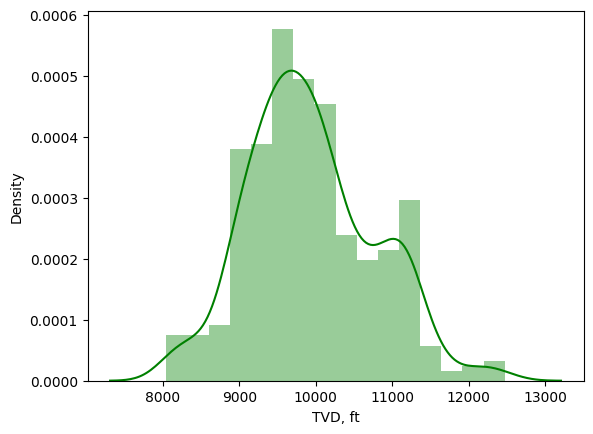

In [11]:
sns.distplot(df['TVD, ft'], norm_hist=True, color='g')

<Axes: >

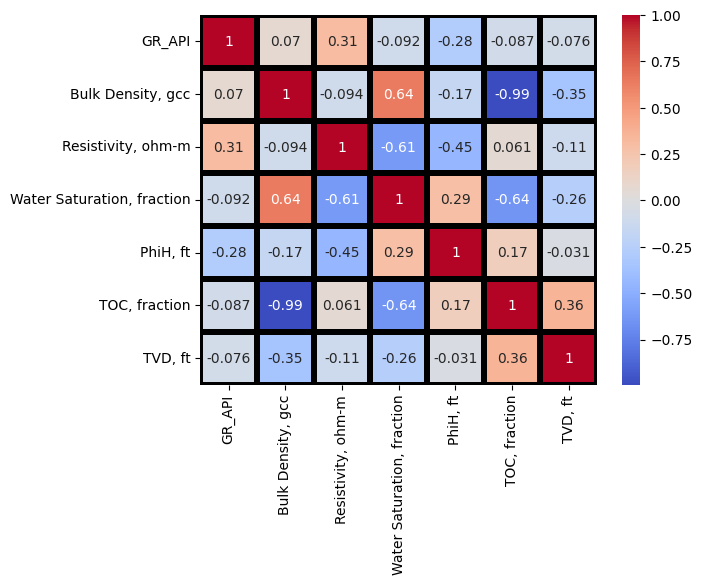

In [12]:
# now let's plot the heat map of all parameters versus one another
# to find the potential collinear features
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=4, linecolor='black')

As shown in the heatmap TOC and bulk densityhave a negative Pearson correlation coefficient of -0.99. This make sense as Toc is derived from bulk density. Therefore lets drop TOC.


In [13]:
df.drop(['TOC, fraction'], axis=1, inplace=True)

In [14]:
# standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

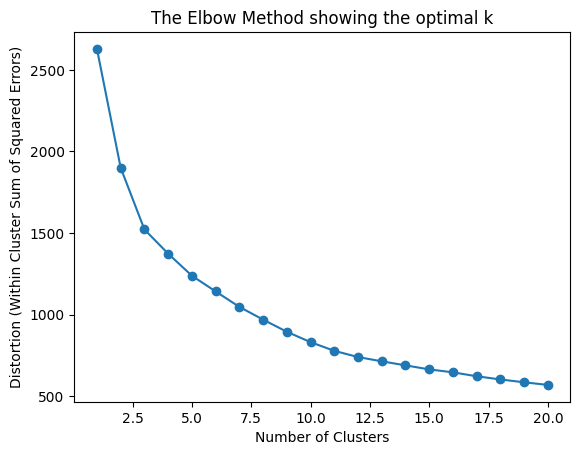

In [15]:
# calculate clusters sum of squared errors
# next plot number of clusters on the x-axis versus within cluster sum of squared errors
from sklearn.cluster import KMeans
distortions = []
for i in range (1, 21):
    km=KMeans(n_clusters=i,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
    km.fit(df_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

In [16]:
print(distortions)

[2628.000000000001, 1900.063693499038, 1522.451811496321, 1374.2291078433182, 1239.1811054000564, 1143.0882975129628, 1048.4631467422664, 970.3736082269522, 896.1826776892005, 832.4729691513642, 779.3373555936985, 741.1728483286583, 715.0389391093695, 690.3421798639846, 665.6744894042826, 647.5003930208459, 623.6081161844386, 603.9449742399262, 586.5591687345318, 570.5130615860872]


In [17]:
n=10
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[ 0.87076866 -0.97883879  0.38000873 -0.77891073  0.23635858  0.60510785]
 [-0.43702597  0.55465562 -0.72948387  0.94387715  2.20250797 -0.35747435]
 [ 0.29039347  0.14795517  1.23604241 -0.59641123 -0.70048503 -0.74714425]
 [-0.95362352 -0.86282759 -0.28015421 -0.74253719 -0.01187808  1.51891269]
 [-0.11678936 -0.20043572 -0.82697437  0.63429846  0.19583089 -0.31751012]
 [ 1.49714297  1.42135886  2.61809734 -0.89343335 -2.06295198 -0.64341298]
 [ 0.93027358  1.88836765 -0.92867931  2.10656149  0.29341464 -0.76343302]
 [-0.81376234 -0.84668052  0.35502005 -0.76527708  0.34691776 -0.3705674 ]
 [-0.63019609  1.182783   -0.5776426   0.96478859 -0.16489011 -0.19384786]
 [ 1.92616794 -0.13674153  0.3616604  -0.65224177 -1.43076904  0.83668123]]


In [20]:
# obtain the labels of each well
labels=kmeans.labels_
labels

array([3, 4, 4, 4, 7, 1, 5, 7, 0, 0, 8, 1, 8, 8, 0, 2, 3, 8, 3, 2, 2, 7,
       3, 9, 2, 4, 1, 4, 3, 4, 6, 8, 0, 8, 4, 6, 2, 0, 7, 1, 1, 8, 8, 4,
       2, 1, 9, 2, 3, 8, 2, 2, 7, 7, 7, 9, 3, 7, 0, 8, 4, 7, 3, 1, 4, 0,
       3, 5, 5, 0, 4, 4, 3, 7, 9, 5, 3, 8, 6, 2, 1, 4, 0, 0, 0, 3, 1, 8,
       2, 7, 2, 5, 3, 0, 0, 8, 8, 8, 8, 8, 1, 0, 0, 7, 4, 1, 7, 7, 6, 1,
       1, 9, 7, 7, 7, 2, 3, 9, 0, 2, 1, 8, 4, 0, 4, 2, 4, 2, 2, 0, 7, 2,
       1, 4, 2, 7, 8, 2, 3, 9, 3, 9, 6, 7, 4, 4, 3, 2, 1, 7, 8, 3, 8, 1,
       9, 7, 2, 3, 4, 2, 6, 0, 3, 2, 5, 4, 6, 1, 3, 2, 7, 4, 2, 8, 8, 4,
       3, 7, 3, 0, 3, 7, 6, 2, 8, 1, 1, 8, 4, 4, 8, 4, 3, 7, 4, 6, 6, 9,
       3, 5, 3, 5, 7, 0, 2, 2, 3, 3, 0, 3, 2, 2, 6, 7, 8, 4, 4, 8, 4, 2,
       8, 8, 8, 8, 1, 2, 2, 5, 6, 6, 6, 7, 0, 0, 3, 0, 4, 3, 4, 4, 2, 0,
       2, 5, 2, 6, 4, 4, 8, 4, 3, 9, 5, 2, 0, 0, 8, 4, 4, 8, 4, 4, 4, 4,
       8, 8, 0, 7, 0, 7, 2, 4, 4, 8, 4, 1, 3, 9, 7, 3, 4, 3, 4, 6, 2, 8,
       8, 1, 6, 1, 3, 3, 2, 9, 7, 0, 4, 4, 2, 2, 2,

In [21]:
# convert "df_scaled" from an array to a df and add the labeled clusters per well
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels
df_scaled.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft",Clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564,3
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779,4
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267,7


In [22]:
# return the data to its original form (unstandarized) by multiplying
# each variableeach var by the standard deviation of that var and adding
# the mean of the var
df_scaled['GR_API']=(df_scaled['GR_API']*(df['GR_API'].std())+df['GR_API'].mean())
df_scaled['Bulk Density, gcc']=(df_scaled['Bulk Density, gcc']*(df['Bulk Density, gcc'].std())+df['Bulk Density, gcc'].mean())
df_scaled['Resistivity, ohm-m']=(df_scaled['Resistivity, ohm-m']*(df['Resistivity, ohm-m'].std())+df['Resistivity, ohm-m'].mean())
df_scaled['Water Saturation, fraction']=(df_scaled['Water Saturation, fraction']*(df['Water Saturation, fraction'].std())+df['Water Saturation, fraction'].mean())
df_scaled['PhiH, ft']=(df_scaled['PhiH, ft']*(df['PhiH, ft'].std())+df['PhiH, ft'].mean())
df_scaled['TVD, ft']=(df_scaled['TVD, ft']*(df['TVD, ft'].std())+df['TVD, ft'].mean())

In [24]:
Group_by=df_scaled.groupby(by='Clusters').mean()
Group_by.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,184.440947,2.222710,25.467746,0.130681,21.036575,10436.143694
1,144.688531,2.253346,16.622987,0.195226,27.304316,9639.143409
2,166.799556,2.245221,32.291957,0.137518,18.050081,9316.503934
3,128.985759,2.225027,20.204996,0.132044,20.245240,11192.757228
4,154.422612,2.238261,15.845803,0.183627,20.907380,9672.233056


In [25]:
# understand the number of counts per each cluster
df_scaled.groupby(by='Clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,56,56,56,56,56,56
1,27,27,27,27,27,27
2,57,57,57,57,57,57
3,53,53,53,53,53,53
4,75,75,75,75,75,75
5,14,14,14,14,14,14
6,23,23,23,23,23,23
7,49,49,49,49,49,49
8,62,62,62,62,62,62
